Objective

The objective of this project is to analyze weather data to uncover trends and patterns in temperature, humidity, and weather events over time. This analysis aims to:

- Clean and preprocess raw weather data for accurate insights.

- Identify extreme weather conditions (e.g., highest and lowest temperatures).

- Explore the frequency of various weather events (e.g., Rain, Sunny, Snow).

- Visualize temperature trends over time and the distribution of weather events.

The project demonstrates foundational skills in data cleaning, exploratory data analysis, and visualization, forming the basis for advanced weather-related analytics.

In [22]:
import pandas as pd

weather_data = pd.read_csv("weather_data.csv")

print(weather_data.info())
print(weather_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          6 non-null      object
 1   temperature  6 non-null      int64 
 2   windspeed    6 non-null      int64 
 3   event        6 non-null      object
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes
None
        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017           35          7  Sunny
2  1/3/2017           28          2   Snow
3  1/4/2017           24          7   Snow
4  1/5/2017           32          4   Rain
5  1/6/2017           31          2  Sunny


Data Loading

The `weather_data.csv` dataset contains information about weather observations, including columns for temperature, humidity, and events.

In [13]:
print( "null :", weather_data.isnull().sum())

null : day            0
temperature    0
windspeed      0
event          0
dtype: int64


In [14]:
print("duplicates:", weather_data.duplicated().sum())

duplicates: 0


In [18]:
weather_data["day"]=pd.to_datetime(weather_data["day"])
print(weather_data["day"].dtype)

datetime64[ns]


Data Overview

- The dataset has 6 rows and 4 columns.

- Columns include:
  - `day`: The date of the observation.

  - `temperature`: The temperature recorded on that day.

  - `windspeed`: The wind speed.

  - `event`: A categorical column indicating weather events (Rain,Snow etc)
  

- There are 0 missing values.

- There are 0 duplicated values.

Date Conversion

- Converted the `day` column to datetime format for time-series analysis.

In [23]:
print(weather_data.describe())

print(weather_data["event"].value_counts())

       temperature  windspeed
count     6.000000   6.000000
mean     30.333333   4.666667
std       3.829708   2.338090
min      24.000000   2.000000
25%      28.750000   2.500000
50%      31.500000   5.000000
75%      32.000000   6.750000
max      35.000000   7.000000
event
Rain     2
Sunny    2
Snow     2
Name: count, dtype: int64


Exploratory Data Analysis (EDA)

- The average temperature is `30.3 C`.

- As shown in the data every event has equal number of occurances.

event
Rain     2
Sunny    2
Snow     2

In [25]:
temp_max = weather_data.loc[weather_data["temperature"].idxmax()]
print(temp_max)

temp_min = weather_data.loc[weather_data["temperature"].idxmin()]
print(temp_min)

day            1/2/2017
temperature          35
windspeed             7
event             Sunny
Name: 1, dtype: object
day            1/4/2017
temperature          24
windspeed             7
event              Snow
Name: 3, dtype: object


- The highest temperature was 35 on 1/2/2017, event : Sunny .

- The lowest temperature was 24 on 1/4/2017, event : Snow.


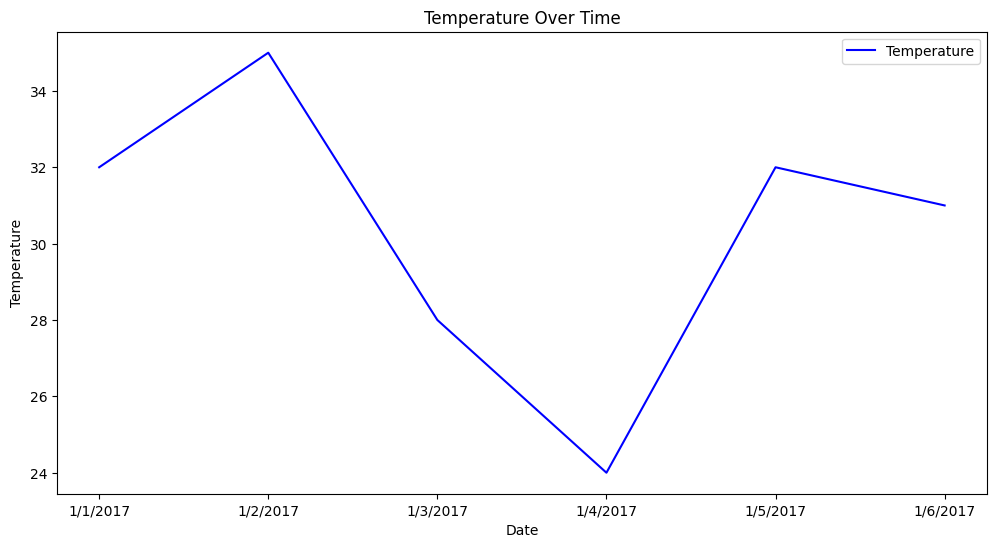

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weather_data['day'], weather_data['temperature'], label='Temperature', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Visualization: Temperature Trends

- The line plot shows how temperature has varied over time.

- As we can see there was an huge dip of around 10 degrees within two months.
    - 1/2/2017 - 1/4/2017 as shown in graph.

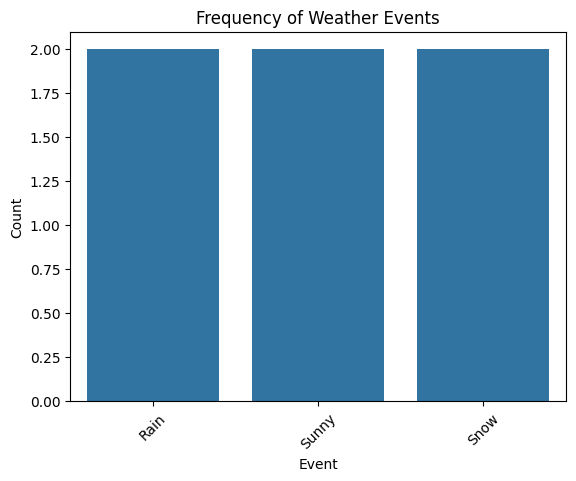

In [29]:
import seaborn as sns

sns.countplot(data=weather_data, x='event')
plt.title('Frequency of Weather Events')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualization: Weather Event Frequency

- This bar plot highlights the occurances of each weather events which is equal.

In [34]:
weather_data.to_csv('cleaned_weather_data.csv', index=False)

 Saving the Cleaned Data
 
- The cleaned dataset is saved as `cleaned_weather_data.csv` for future analysis.